In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import kagglehub

# Download latest version
path = kagglehub.dataset_download("rajatsurana979/fast-food-sales-report")

print("Path to dataset files:", path)

100%|██████████| 122k/122k [00:00<00:00, 56.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rajatsurana979/fast-food-sales-report/versions/2


In [31]:
dataset = pd.read_csv(path + "/Balaji Fast Food Sales.csv")
print(dataset)

     order_id        date        item_name  item_type  item_price  quantity  \
0           1  07-03-2022         Aalopuri   Fastfood          20        13   
1           2   8/23/2022          Vadapav   Fastfood          20        15   
2           3  11/20/2022          Vadapav   Fastfood          20         1   
3           4  02-03-2023  Sugarcane juice  Beverages          25         6   
4           5  10-02-2022  Sugarcane juice  Beverages          25         8   
..        ...         ...              ...        ...         ...       ...   
995       996   3/19/2023          Frankie   Fastfood          50        10   
996       997   9/20/2022         Sandwich   Fastfood          60         7   
997       998   1/26/2023         Sandwich   Fastfood          60        13   
998       999   8/27/2022         Panipuri   Fastfood          20         5   
999      1000   5/29/2022         Aalopuri   Fastfood          20         3   

     transaction_amount transaction_type received_b

In [33]:
print(dataset.describe())
print(dataset.info())

          order_id   item_price     quantity  transaction_amount
count  1000.000000  1000.000000  1000.000000         1000.000000
mean    500.500000    33.315000     8.162000          275.230000
std     288.819436    14.921744     4.413075          204.402979
min       1.000000    20.000000     1.000000           20.000000
25%     250.750000    20.000000     4.000000          120.000000
50%     500.500000    25.000000     8.000000          240.000000
75%     750.250000    50.000000    12.000000          360.000000
max    1000.000000    60.000000    15.000000          900.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price      

In [34]:
dataset = dataset.drop('order_id',axis=1)
dataset = dataset.drop('date',axis=1)
dataset = dataset.drop('received_by',axis=1)
print(dataset)

           item_name  item_type  item_price  quantity  transaction_amount  \
0           Aalopuri   Fastfood          20        13                 260   
1            Vadapav   Fastfood          20        15                 300   
2            Vadapav   Fastfood          20         1                  20   
3    Sugarcane juice  Beverages          25         6                 150   
4    Sugarcane juice  Beverages          25         8                 200   
..               ...        ...         ...       ...                 ...   
995          Frankie   Fastfood          50        10                 500   
996         Sandwich   Fastfood          60         7                 420   
997         Sandwich   Fastfood          60        13                 780   
998         Panipuri   Fastfood          20         5                 100   
999         Aalopuri   Fastfood          20         3                  60   

    transaction_type time_of_sale  
0                NaN        Night  
1  

In [36]:
print(dataset.transaction_type.unique())

[nan 'Cash' 'Online']


In [38]:
#null check
print(dataset.isnull().sum())
dataset = dataset.drop('transaction_type' , axis=1)
print(dataset)

item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
time_of_sale            0
dtype: int64
           item_name  item_type  item_price  quantity  transaction_amount  \
0           Aalopuri   Fastfood          20        13                 260   
1            Vadapav   Fastfood          20        15                 300   
2            Vadapav   Fastfood          20         1                  20   
3    Sugarcane juice  Beverages          25         6                 150   
4    Sugarcane juice  Beverages          25         8                 200   
..               ...        ...         ...       ...                 ...   
995          Frankie   Fastfood          50        10                 500   
996         Sandwich   Fastfood          60         7                 420   
997         Sandwich   Fastfood          60        13                 780   
998         Panipuri   Fastfood    

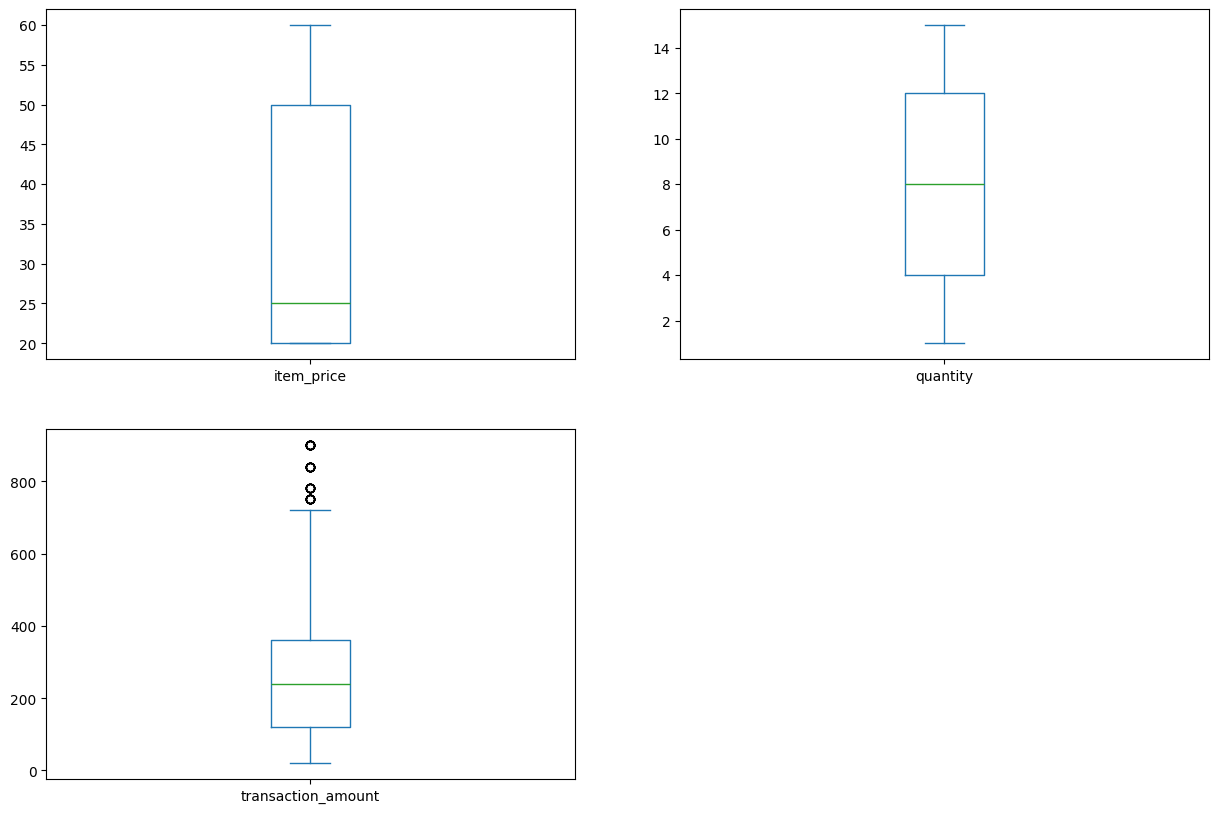

In [44]:
#outlier check with box plot
dataset.plot(kind='box', subplots=True, layout=(2,2), figsize=(15, 10))
plt.show()

In [ ]:
#remove outlier from transaction_amount

Q1 = dataset.transaction_amount.quantile(0.25)

Q3 = dataset.transaction_amount.quantile(0.75)

IQR = Q3 - Q1

dataset = dataset[~((dataset.transaction_amount < (Q1 - 1.5 * IQR)) |(dataset.transaction_amount > (Q3 + 1.5 * IQR)))]

print(dataset)

           item_name  item_type  item_price  quantity  transaction_amount  \
0           Aalopuri   Fastfood          20        13                 260   
1            Vadapav   Fastfood          20        15                 300   
2            Vadapav   Fastfood          20         1                  20   
3    Sugarcane juice  Beverages          25         6                 150   
4    Sugarcane juice  Beverages          25         8                 200   
..               ...        ...         ...       ...                 ...   
994  Sugarcane juice  Beverages          25         1                  25   
995          Frankie   Fastfood          50        10                 500   
996         Sandwich   Fastfood          60         7                 420   
998         Panipuri   Fastfood          20         5                 100   
999         Aalopuri   Fastfood          20         3                  60   

    time_of_sale  
0          Night  
1      Afternoon  
2      Afternoon  

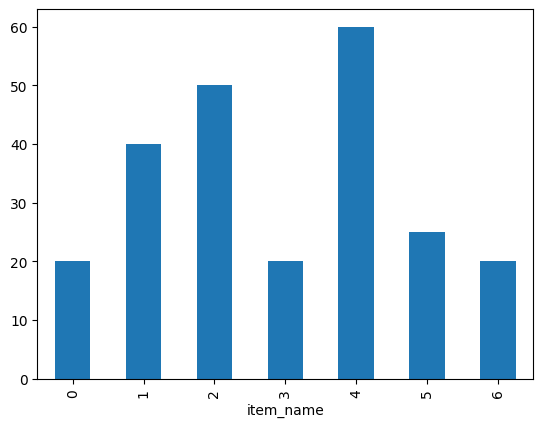

In [71]:
#item type- price plot
dataset.groupby('item_name')['item_price'].mean().plot(kind='bar')
plt.show()

In [50]:
#encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
le = LabelEncoder()
oe = OrdinalEncoder()
dataset['item_name'] = le.fit_transform(dataset['item_name'])
dataset['item_type'] = le.fit_transform(dataset['item_type'])
dataset['time_of_sale'] = oe.fit_transform(dataset[['time_of_sale']])
print(dataset)

     item_name  item_type  item_price  quantity  transaction_amount  \
0            0          1          20        13                 260   
1            6          1          20        15                 300   
2            6          1          20         1                  20   
3            5          0          25         6                 150   
4            5          0          25         8                 200   
..         ...        ...         ...       ...                 ...   
994          5          0          25         1                  25   
995          2          1          50        10                 500   
996          4          1          60         7                 420   
998          3          1          20         5                 100   
999          0          1          20         3                  60   

     time_of_sale  
0             4.0  
1             0.0  
2             0.0  
3             4.0  
4             1.0  
..            ...  
994    

<ipython-input-50-82acee5f7d71>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['item_name'] = le.fit_transform(dataset['item_name'])
<ipython-input-50-82acee5f7d71>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['item_type'] = le.fit_transform(dataset['item_type'])
<ipython-input-50-82acee5f7d71>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [51]:
#X = dataset without item_price
#Y= item_price
X = dataset.drop('item_price',axis=1)
Y = dataset['item_price']
print(X)
print(Y)

     item_name  item_type  quantity  transaction_amount  time_of_sale
0            0          1        13                 260           4.0
1            6          1        15                 300           0.0
2            6          1         1                  20           0.0
3            5          0         6                 150           4.0
4            5          0         8                 200           1.0
..         ...        ...       ...                 ...           ...
994          5          0         1                  25           4.0
995          2          1        10                 500           1.0
996          4          1         7                 420           1.0
998          3          1         5                 100           0.0
999          0          1         3                  60           2.0

[956 rows x 5 columns]
0      20
1      20
2      20
3      25
4      25
       ..
994    25
995    50
996    60
998    20
999    20
Name: item_price, Length: 

In [52]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(764, 5)
(192, 5)
(764,)
(192,)


In [53]:
#standart scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
#training model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
print(r2_score(Y_test, Y_pred))

0.784692643984035


In [68]:
print(regressor.coef_)
print(regressor.intercept_)
print(r2_score(Y_test, Y_pred))
# Kullanıcıdan girdi al
item_name_input = int(input("Item Name (encoded): "))
item_type_input = int(input("Item Type (encoded): "))
quantity_input = int(input("Quantity: "))
time_of_sale_input = float(input("Time of Sale: "))
transaction_amount_input = int(input("Transaction Amount: "))

# Tahmin yap
input_data = [[item_name_input, item_type_input, quantity_input, time_of_sale_input,transaction_amount_input]]
predicted_amount = model.predict(input_data)
print("Estimated Price:", predicted_amount[0])

[ -0.19019668   0.25317734 -13.9045037   17.92775076   0.06362981]
32.40837696335078
0.784692643984035
Item Name (encoded): 5
Item Type (encoded): 2
Quantity: 10
Time of Sale: 0.0
Transaction Amount: 600
Estimated Price: 60.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


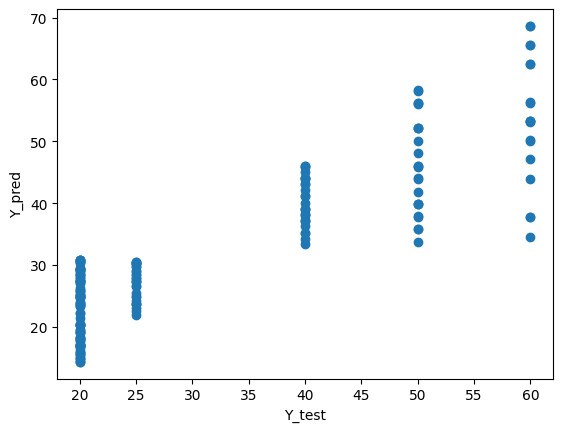

In [69]:
# prompt: price item type grsph

# Assuming 'model' is your trained LinearRegression model (regressor in your code)
# You need to define 'model' before running this code.  It should be your trained model.

# Kullanıcıdan girdi al
item_name_input = int(input("Item Name (encoded): "))
item_type_input = int(input("Item Type (encoded): "))
quantity_input = int(input("Quantity: "))
time_of_sale_input = float(input("Time of Sale (encoded): "))
transaction_amount_input = int(input("Transaction Amount: "))

# Tahmin yap
input_data = [[item_name_input, item_type_input, quantity_input, time_of_sale_input, transaction_amount_input]]
predicted_price = regressor.predict(input_data) # Use the trained model here
print("Estimated Price:", predicted_price[0])


Item Name (encoded): 2
Item Type (encoded): 1
Quantity: 8
Time of Sale (encoded): 4.0
Transaction Amount: 500
Estimated Price: 24.57103859246419
